## Stroop Experiment

In [1]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from figures import univariate

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
# Data is stored in data folder within resources folder one level up
os.chdir('..')

In [3]:
file_loc = os.path.join("data", "stroopdata.csv")
df = pd.read_csv(file_loc, sep=',')

df.head(30)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


## Visualise distribution

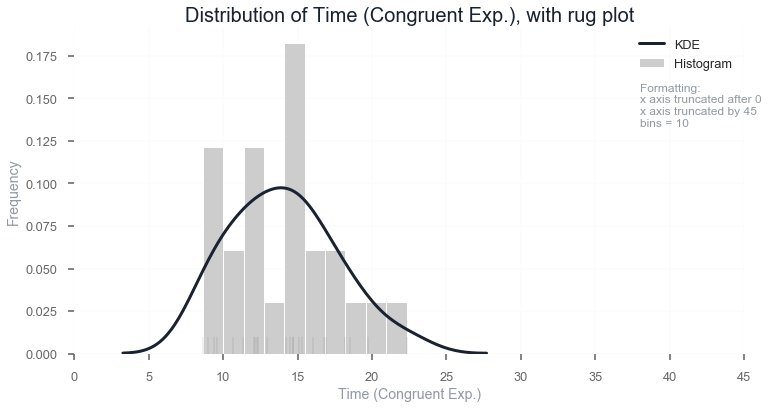

In [4]:
univariate(df["Congruent"], "Time (Congruent Exp.)", bin_n=10, x_truncation_upper=45, x_truncation_lower=0)

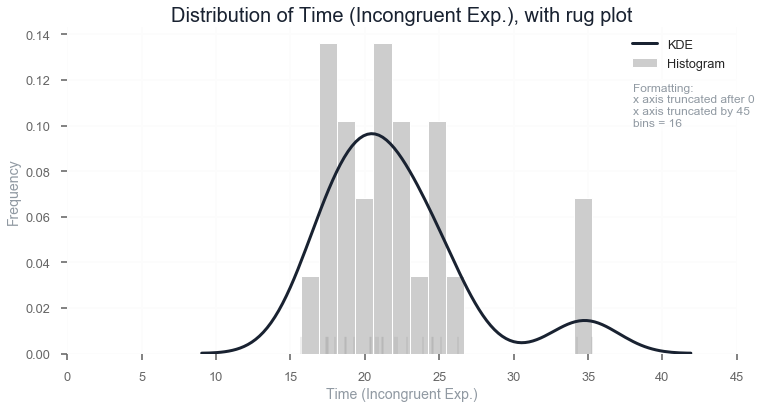

In [5]:
univariate(df["Incongruent"], "Time (Incongruent Exp.)", bin_n=16, x_truncation_upper=45, x_truncation_lower=0)

In [19]:
sybmol_dict = {
               'sample_mean_str':r'$\bar x$'
               }

In [ ]:
def mode(data, name, sample=True) 
    v_mode = data.mode()
    sample_mode_str = r'\mathit{Mo}'

,0,Congruent,Incongruent
0,$\bar x$,14.05,22.02
1,$\mathit{Md}$,14.36,21.02


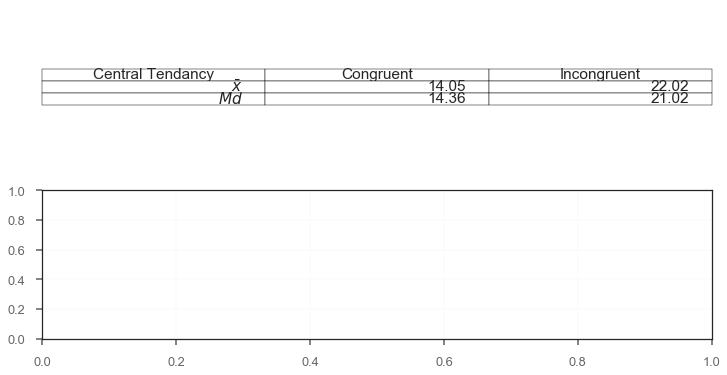

In [83]:


def central_tend(data, name, axs, sample=True, f=2):
    
    # Asses how many columns are in input data
    a, b = data.values.shape
    if b == 1:
        multi_column = False
    else:
        multi_column = True
    
    # Central tendacy
    v_mean = round(data.mean(), f)
    v_median = round(data.median(), f)
    
    # Use built in tex only, no depandancy needed
    sample_mean_str = r'$\bar x$'
    sample_median_str = r'$\mathit{Md}$'
    
    symbols = pd.DataFrame([sample_mean_str, sample_median_str])
    val = pd.DataFrame([v_mean, v_median])
    
    data = pd.concat([symbols, val], axis=1)
    
    labels = ["Central Tendancy"]
    for i in name:
        labels.append(i)
    
    axs[0].axis('off')
    central_tendancy = axs[0].table(cellText=data.values, colLabels=labels, loc='center')

    return data

fig, axs = plt.subplots(2,1)
data = central_tend(df[["Congruent", "Incongruent"]], ["Congruent", "Incongruent"], axs)
data


In [29]:
from scipy import stats

def table_statistics(data, sample=True):
    """Returns calculated common statistics
    on a column of data.
    """
    
    # n value
    v_size = data.count()
    
    # Central tendacy
    v_mean = data.mean()
    v_mode = data.mode()
    v_median = data.median()
    
    # Measures of disperssion
    v_bessel_sd = data.std()
    v_var = data.var()
    v_range = (data.max()-data.min())
    v_iqr = (data.quantile(0.75)-data.quantile(0.25))
    v_mad = data.mad()
    
    # Distribution of values & percentiles
    v_max = data.max()
    v_95 = data.quantile(0.95)
    v_90 = data.quantile(0.9)
    v_75 = data.quantile(0.75)
    v_50 = data.quantile(0.5)
    v_25 = data.quantile(0.25)
    v_10 = data.quantile(0.1)
    v_05 = data.quantile(0.05)
    v_min = data.min()
    
    # Tail properties
    v_skew = data.skew()
    v_kurt = data.kurt()
    
table_statistics(df['Congruent'])

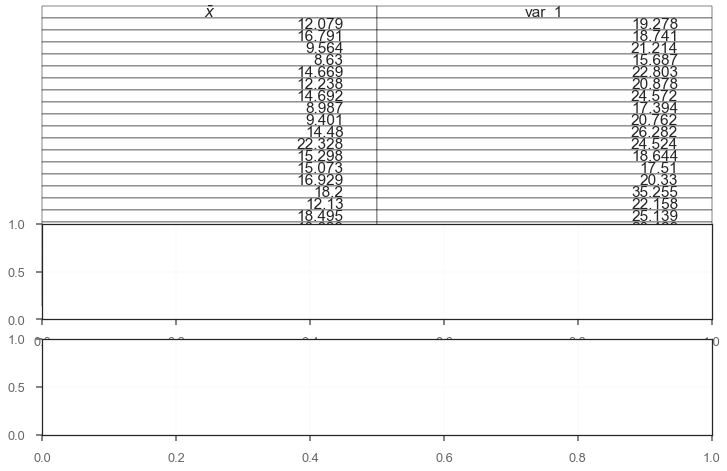

In [17]:
fig, axs =plt.subplots(3,1)

data = df.values
collabel=(r'$\bar x$', "var_1", "var_2")
axs[0].axis('off')
central_tendancy = axs[0].table(cellText=data, colLabels=collabel, loc='center')